# Which borough has the most deadliest crashes? An Exploratory Data Analysis

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

In [3]:
data = pd.read_csv("/Users/lindaseong/Desktop/Data_Science_Portfolio_work_2023/Project1_Motor_Vehicle_Crashes/Motor_Vehicle_Collisions_-_Crashes.csv")

/Users/lindaseong/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [5]:
# replace space with another character 
data.columns = data.columns.str.replace(' ', '_') 
  
# print file after removing special character 
print("\n\n", data) 



          CRASH_DATE CRASH_TIME    BOROUGH ZIP_CODE   LATITUDE  LONGITUDE  \
0        09/11/2021       2:39        NaN      NaN        NaN        NaN   
1        03/26/2022      11:45        NaN      NaN        NaN        NaN   
2        06/29/2022       6:55        NaN      NaN        NaN        NaN   
3        09/11/2021       9:35   BROOKLYN  11208.0  40.667202 -73.866500   
4        12/14/2021       8:13   BROOKLYN  11233.0  40.683304 -73.917274   
...             ...        ...        ...      ...        ...        ...   
2038379  09/19/2023      15:55        NaN      NaN  40.761436 -73.761760   
2038380  09/14/2023      23:15  MANHATTAN  10016.0  40.744064 -73.987755   
2038381  09/12/2023      16:00     QUEENS  11433.0  40.707947 -73.783310   
2038382  09/19/2023      10:45        NaN      NaN  40.840230 -73.880104   
2038383  09/19/2023      15:40        NaN      NaN  40.635520 -74.016700   

                        LOCATION           ON_STREET_NAME CROSS_STREET_NAME  \
0    

In [6]:
value_counts = data['CONTRIBUTING_FACTOR_VEHICLE_1'].value_counts()
print(value_counts)

Unspecified                       697578
Driver Inattention/Distraction    406291
Failure to Yield Right-of-Way     120574
Following Too Closely             108708
Backing Unsafely                   75598
                                   ...  
Cell Phone (hand-held)                79
Windshield Inadequate                 77
Texting                               50
Listening/Using Headphones            24
1                                     10
Name: CONTRIBUTING_FACTOR_VEHICLE_1, Length: 61, dtype: int64


In [47]:
#drop unecessary columns
data.drop(columns = ['LATITUDE', 'LONGITUDE', 'LOCATION', 'COLLISION_ID','CROSS_STREET_NAME', 'OFF_STREET_NAME', 'ON_STREET_NAME'], inplace = True)

KeyError: "['LATITUDE' 'LONGITUDE' 'LOCATION' 'COLLISION_ID' 'CROSS_STREET_NAME'\n 'OFF_STREET_NAME' 'ON_STREET_NAME'] not found in axis"

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
NUMBER_OF_PERSONS_INJURED,2038366.0,0.305231,0.696068,0.0,0.0,0.0,0.0,43.0
NUMBER_OF_PERSONS_KILLED,2038353.0,0.001461,0.040258,0.0,0.0,0.0,0.0,8.0
NUMBER_OF_PEDESTRIANS_INJURED,2038384.0,0.055552,0.242100,0.0,0.0,0.0,0.0,27.0
NUMBER_OF_PEDESTRIANS_KILLED,2038384.0,0.000728,0.027459,0.0,0.0,0.0,0.0,6.0
NUMBER_OF_CYCLIST_INJURED,2038384.0,0.026512,0.162638,0.0,0.0,0.0,0.0,4.0
NUMBER_OF_CYCLIST_KILLED,2038384.0,0.000113,0.010668,0.0,0.0,0.0,0.0,2.0
NUMBER_OF_MOTORIST_INJURED,2038384.0,0.219780,0.657140,0.0,0.0,0.0,0.0,43.0
NUMBER_OF_MOTORIST_KILLED,2038384.0,0.000599,0.026674,0.0,0.0,0.0,0.0,5.0


In [9]:
print(data.isnull().sum())
print(data.shape)

CRASH_DATE                             0
CRASH_TIME                             0
BOROUGH                           634128
ZIP_CODE                          634370
NUMBER_OF_PERSONS_INJURED             18
NUMBER_OF_PERSONS_KILLED              31
NUMBER_OF_PEDESTRIANS_INJURED          0
NUMBER_OF_PEDESTRIANS_KILLED           0
NUMBER_OF_CYCLIST_INJURED              0
NUMBER_OF_CYCLIST_KILLED               0
NUMBER_OF_MOTORIST_INJURED             0
NUMBER_OF_MOTORIST_KILLED              0
CONTRIBUTING_FACTOR_VEHICLE_1       6489
CONTRIBUTING_FACTOR_VEHICLE_2     312477
CONTRIBUTING_FACTOR_VEHICLE_3    1893473
CONTRIBUTING_FACTOR_VEHICLE_4    2005811
CONTRIBUTING_FACTOR_VEHICLE_5    2029565
VEHICLE_TYPE_CODE_1                13008
VEHICLE_TYPE_CODE_2               383554
VEHICLE_TYPE_CODE_3              1898587
VEHICLE_TYPE_CODE_4              2006910
VEHICLE_TYPE_CODE_5              2029833
dtype: int64
(2038384, 22)


In [48]:
data.drop(columns = ['ZIP_CODE', 'VEHICLE_TYPE_CODE_1', 'VEHICLE_TYPE_CODE_2', 'VEHICLE_TYPE_CODE_3', 'VEHICLE_TYPE_CODE_4', 'VEHICLE_TYPE_CODE_5'])

,CRASH_DATE,CRASH_TIME,BOROUGH,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,...,TIME_OF_DAY,PERSONS_KILLED_INDICATOR,PERSONS_INJURED_INDICATOR,PEDESTRIANS_KILLED_INDICATOR,PEDESTRIANS_INJURED_INDICATOR,CYCLIST_INJURED_INDICATOR,CYCLIST_KILLED_INDICATOR,MOTORIST_INJURED_INDICATOR,MOTORIST_KILLED_INDICATOR,YEAR
0,2021-09-11,2024-02-18 02:39:00,NaN,2,0,0,0,0,0,2,...,Night,No,Yes,No,No,No,No,Yes,No,2021
1,2022-03-26,2024-02-18 11:45:00,NaN,1,0,0,0,0,0,1,...,Morning,No,Yes,No,No,No,No,Yes,No,2022
2,2022-06-29,2024-02-18 06:55:00,NaN,0,0,0,0,0,0,0,...,Morning,No,No,No,No,No,No,No,No,2022
3,2021-09-11,2024-02-18 09:35:00,BROOKLYN,0,0,0,0,0,0,0,...,Morning,No,No,No,No,No,No,No,No,2021
4,2021-12-14,2024-02-18 08:13:00,BROOKLYN,0,0,0,0,0,0,0,...,Morning,No,No,No,No,No,No,No,No,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038379,2023-09-19,2024-02-18 15:55:00,NaN,0,0,0,0,0,0,0,...,Afternoon,No,No,No,No,No,No,No,No,2023
2038380,2023-09-14,2024-02-18 23:15:00,MANHATTAN,0,0,0,0,0,0,0,...,Night,No,No,No,No,No,No,No,No,2023
2038381,2023-09-12,2024-02-18 16:00:00,QUEENS,1,0,0,0,0,0,1,...,Afternoon,No,Yes,No,No,No,No,Yes,No,2023
2038382,2023-09-19,2024-02-18 10:45:00,NaN,1,0,0,0,0,0,1,...,Morning,No,Yes,No,No,No,No,Yes,No,2023


In [10]:
data['NUMBER_OF_PERSONS_INJURED'] = data['NUMBER_OF_PERSONS_INJURED'].fillna(0)
data['NUMBER_OF_PERSONS_KILLED'] = data['NUMBER_OF_PERSONS_KILLED'].fillna(0)
print(data.isnull().sum())

CRASH_DATE                             0
CRASH_TIME                             0
BOROUGH                           634128
ZIP_CODE                          634370
NUMBER_OF_PERSONS_INJURED              0
NUMBER_OF_PERSONS_KILLED               0
NUMBER_OF_PEDESTRIANS_INJURED          0
NUMBER_OF_PEDESTRIANS_KILLED           0
NUMBER_OF_CYCLIST_INJURED              0
NUMBER_OF_CYCLIST_KILLED               0
NUMBER_OF_MOTORIST_INJURED             0
NUMBER_OF_MOTORIST_KILLED              0
CONTRIBUTING_FACTOR_VEHICLE_1       6489
CONTRIBUTING_FACTOR_VEHICLE_2     312477
CONTRIBUTING_FACTOR_VEHICLE_3    1893473
CONTRIBUTING_FACTOR_VEHICLE_4    2005811
CONTRIBUTING_FACTOR_VEHICLE_5    2029565
VEHICLE_TYPE_CODE_1                13008
VEHICLE_TYPE_CODE_2               383554
VEHICLE_TYPE_CODE_3              1898587
VEHICLE_TYPE_CODE_4              2006910
VEHICLE_TYPE_CODE_5              2029833
dtype: int64


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2038384 entries, 0 to 2038383
Data columns (total 22 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH_DATE                     object 
 1   CRASH_TIME                     object 
 2   BOROUGH                        object 
 3   ZIP_CODE                       object 
 4   NUMBER_OF_PERSONS_INJURED      float64
 5   NUMBER_OF_PERSONS_KILLED       float64
 6   NUMBER_OF_PEDESTRIANS_INJURED  int64  
 7   NUMBER_OF_PEDESTRIANS_KILLED   int64  
 8   NUMBER_OF_CYCLIST_INJURED      int64  
 9   NUMBER_OF_CYCLIST_KILLED       int64  
 10  NUMBER_OF_MOTORIST_INJURED     int64  
 11  NUMBER_OF_MOTORIST_KILLED      int64  
 12  CONTRIBUTING_FACTOR_VEHICLE_1  object 
 13  CONTRIBUTING_FACTOR_VEHICLE_2  object 
 14  CONTRIBUTING_FACTOR_VEHICLE_3  object 
 15  CONTRIBUTING_FACTOR_VEHICLE_4  object 
 16  CONTRIBUTING_FACTOR_VEHICLE_5  object 
 17  VEHICLE_TYPE_CODE_1            object 
 18  VE

In [12]:
# convert the 'Crash Date' column to datetime format

data['CRASH_DATE'] = data['CRASH_DATE'].astype('datetime64[ns]')
data['CRASH_TIME'] = data['CRASH_TIME'].astype('datetime64[ns]')

# change number of persons to int
data['NUMBER_OF_PERSONS_INJURED'] = data['NUMBER_OF_PERSONS_INJURED'].astype('int64')
data['NUMBER_OF_PERSONS_KILLED'] = data['NUMBER_OF_PERSONS_KILLED'].astype('int64')

In [16]:

# Convert the "crash_date" column to datetime
data['CRASH_DATE'] = pd.to_datetime(data['CRASH_DATE'], format='%m/%d/%Y')

# ADD the year from the "crash_date" column as new column
data['YEAR'] = data['CRASH_DATE'].dt.year


# Print the DataFrame with the added "year" column
print(data)

# Now, you can filter the data by year
#year_to_filter = 2021  # Change this to the desired year
#year_wise_data = data[data['YEAR'] == year_to_filter]

# Print the year-wise data
#print(year_wise_data)


        CRASH_DATE          CRASH_TIME    BOROUGH ZIP_CODE  \
0       2021-09-11 2024-02-18 02:39:00        NaN      NaN   
1       2022-03-26 2024-02-18 11:45:00        NaN      NaN   
2       2022-06-29 2024-02-18 06:55:00        NaN      NaN   
3       2021-09-11 2024-02-18 09:35:00   BROOKLYN  11208.0   
4       2021-12-14 2024-02-18 08:13:00   BROOKLYN  11233.0   
...            ...                 ...        ...      ...   
2038379 2023-09-19 2024-02-18 15:55:00        NaN      NaN   
2038380 2023-09-14 2024-02-18 23:15:00  MANHATTAN  10016.0   
2038381 2023-09-12 2024-02-18 16:00:00     QUEENS  11433.0   
2038382 2023-09-19 2024-02-18 10:45:00        NaN      NaN   
2038383 2023-09-19 2024-02-18 15:40:00        NaN      NaN   

         NUMBER_OF_PERSONS_INJURED  NUMBER_OF_PERSONS_KILLED  \
0                                2                         0   
1                                1                         0   
2                                0                         0   

In [17]:
# Convert the "military_time" column to datetime
data['CRASH_TIME'] = pd.to_datetime(data['CRASH_TIME'], format='%H:%M')

# Define a function to categorize the time of day
def categorize_time(time):
    if 6 <= time.hour < 12:
        return "Morning"
    elif 12 <= time.hour < 18:
        return "Afternoon"
    elif 18 <= time.hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply the categorize_time function to create a new "time_of_day" column
data['TIME_OF_DAY'] = data['CRASH_TIME'].apply(categorize_time)

# Print the DataFrame with the "time_of_day" column
print(data)


        CRASH_DATE          CRASH_TIME    BOROUGH ZIP_CODE  \
0       2021-09-11 2024-02-18 02:39:00        NaN      NaN   
1       2022-03-26 2024-02-18 11:45:00        NaN      NaN   
2       2022-06-29 2024-02-18 06:55:00        NaN      NaN   
3       2021-09-11 2024-02-18 09:35:00   BROOKLYN  11208.0   
4       2021-12-14 2024-02-18 08:13:00   BROOKLYN  11233.0   
...            ...                 ...        ...      ...   
2038379 2023-09-19 2024-02-18 15:55:00        NaN      NaN   
2038380 2023-09-14 2024-02-18 23:15:00  MANHATTAN  10016.0   
2038381 2023-09-12 2024-02-18 16:00:00     QUEENS  11433.0   
2038382 2023-09-19 2024-02-18 10:45:00        NaN      NaN   
2038383 2023-09-19 2024-02-18 15:40:00        NaN      NaN   

         NUMBER_OF_PERSONS_INJURED  NUMBER_OF_PERSONS_KILLED  \
0                                2                         0   
1                                1                         0   
2                                0                         0   

In [14]:
# Create new binary columns for determining proportion of crashes affecting people

data['PERSONS_KILLED_INDICATOR'] = data['NUMBER_OF_PERSONS_KILLED'].apply(lambda x: 'Yes' if x > 0 else 'No')
data['PERSONS_INJURED_INDICATOR'] = data['NUMBER_OF_PERSONS_INJURED'].apply(lambda x: 'Yes' if x > 0 else 'No')
data['PEDESTRIANS_KILLED_INDICATOR'] = data['NUMBER_OF_PEDESTRIANS_KILLED'].apply(lambda x: 'Yes' if x > 0 else 'No')
data['PEDESTRIANS_INJURED_INDICATOR'] = data['NUMBER_OF_PEDESTRIANS_INJURED'].apply(lambda x: 'Yes' if x > 0 else 'No')
data['CYCLIST_INJURED_INDICATOR'] = data['NUMBER_OF_CYCLIST_INJURED'].apply(lambda x: 'Yes' if x > 0 else 'No')
data['CYCLIST_KILLED_INDICATOR'] = data['NUMBER_OF_CYCLIST_KILLED'].apply(lambda x: 'Yes' if x > 0 else 'No')
data['MOTORIST_INJURED_INDICATOR'] = data['NUMBER_OF_MOTORIST_INJURED'].apply(lambda x: 'Yes' if x > 0 else 'No')
data['MOTORIST_KILLED_INDICATOR'] = data['NUMBER_OF_MOTORIST_KILLED'].apply(lambda x: 'Yes' if x > 0 else 'No')


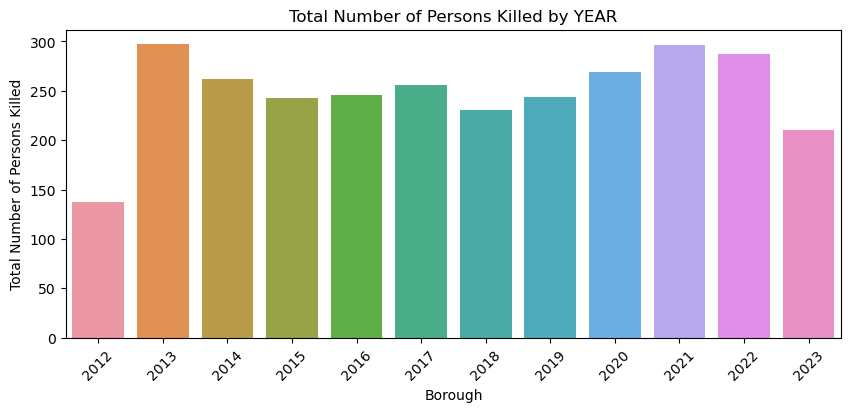

In [45]:
# Calculate the total number of persons killed for each borough
total_killed_by_borough = data.groupby('YEAR')['NUMBER_OF_PERSONS_KILLED'].sum()

# Create a barplot
plt.figure(figsize=(10,4))
sns.barplot(x=total_killed_by_borough.index, y=total_killed_by_borough.values)

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Total Number of Persons Killed')
plt.title('Total Number of Persons Killed by YEAR')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

2013 and 2021 have the highest number of fatal crashes.

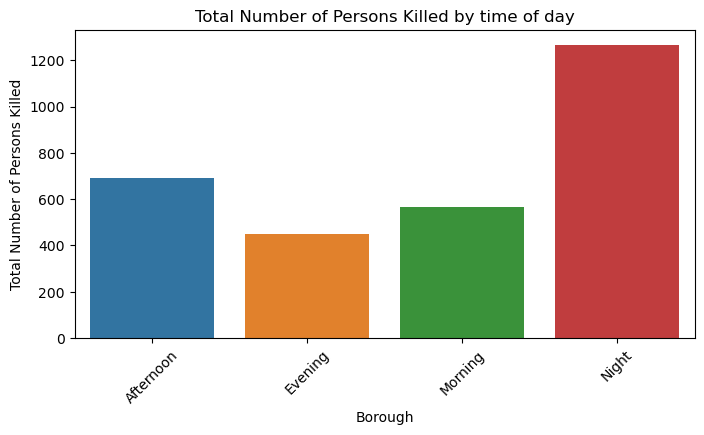

In [43]:
# Calculate the total number of persons killed for each borough
total_killed_by_borough = data.groupby('TIME_OF_DAY')['NUMBER_OF_PERSONS_KILLED'].sum()

# Create a barplot
plt.figure(figsize=(8,4))
sns.barplot(x=total_killed_by_borough.index, y=total_killed_by_borough.values)

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Total Number of Persons Killed')
plt.title('Total Number of Persons Killed by time of day')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

Most of the fatal crashes occur during night, which makes sense since visibility is limited due to the darkness, along with driving under the influence.

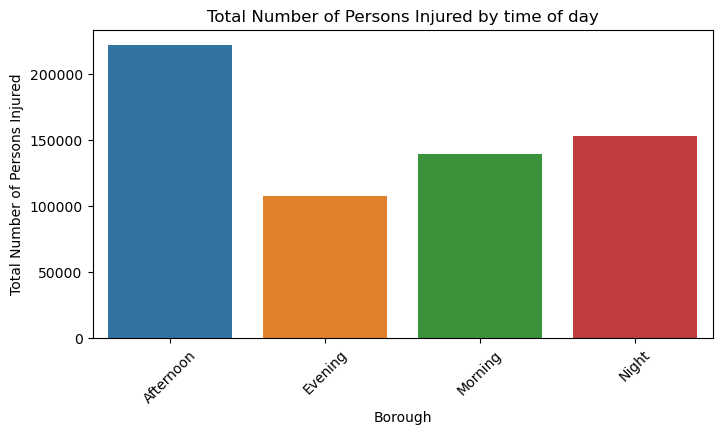

In [64]:
# Calculate the total number of persons killed for each borough
total_killed_by_borough = data.groupby('TIME_OF_DAY')['NUMBER_OF_PERSONS_INJURED'].sum()

# Create a barplot
plt.figure(figsize=(8,4))
sns.barplot(x=total_killed_by_borough.index, y=total_killed_by_borough.values)

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Total Number of Persons Injured')
plt.title('Total Number of Persons Injured by time of day')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

The most crashes resulting in injuries occurs in the afternoon. These could potentially be due to true accidents, rush hour traffic, etc.

# Dive into Persons 

## Persons Killed

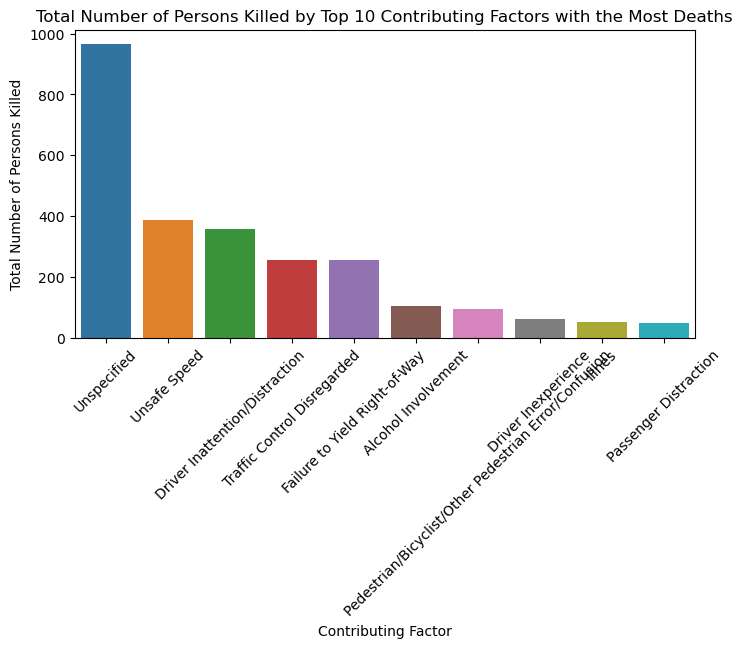

In [41]:
# Calculate the top 10 contributing factors with the highest total number of persons killed
top_10_factors = data.groupby('CONTRIBUTING_FACTOR_VEHICLE_1')['NUMBER_OF_PERSONS_KILLED'].sum().nlargest(10)

# Create a barplot
plt.figure(figsize=(8,4))
sns.barplot(x=top_10_factors.index, y=top_10_factors.values)

# Add labels and title
plt.xlabel('Contributing Factor')
plt.ylabel('Total Number of Persons Killed')
plt.title('Total Number of Persons Killed by Top 10 Contributing Factors with the Most Deaths')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


The #1 contributing factor to vehicle crashes is unspecified, meaning the reason was not documented. That aside, the second highest cause is unsafe speed. Reaction times may not be fast enough when driving past the speed limit, leading to crashes. The third highest is driver inattention/distraction. This would include texting, fumbling with car buttons, etc, which contributes to many accidents. 

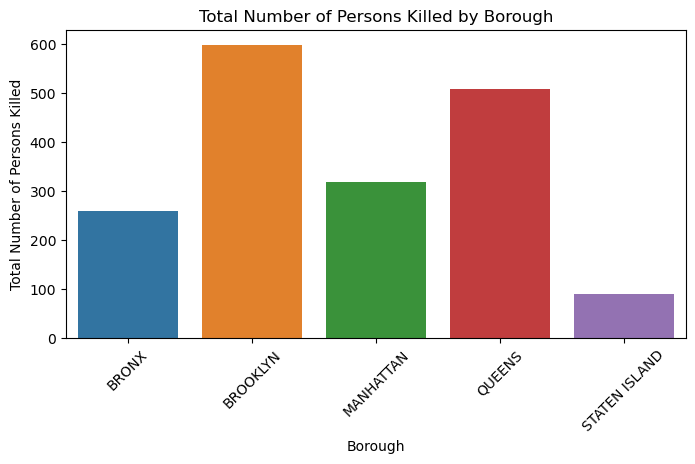

In [40]:
# Calculate the total number of persons killed for each borough
total_killed_by_borough = data.groupby('BOROUGH')['NUMBER_OF_PERSONS_KILLED'].sum()

# Create a barplot
plt.figure(figsize=(8,4))
sns.barplot(x=total_killed_by_borough.index, y=total_killed_by_borough.values)

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Total Number of Persons Killed')
plt.title('Total Number of Persons Killed by Borough')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

Brooklyn has the highest number of fatal vehicle crashes compared to other boroughs, with queens second. The most likely reason for this is that brooklyn and queens has the greatest number of residents at around 2.5 million and 2.2 million people, respectively. Let's normalize by population, and show the total number of persons killed per 100,000 people

Population estimates based on https://www.citypopulation.de/en/usa/newyorkcity/ \
Bronx: 1,379,946\
Brooklyn (Kings County): 2,590,516\
Manhattan (New York County): 1,596,273\
Queens: 2,278,029\
Staten Island (Richmond County): 491,133\

In [24]:
total_killed_by_borough

BOROUGH
BRONX            259
BROOKLYN         599
MANHATTAN        320
QUEENS           510
STATEN ISLAND     91
Name: NUMBER_OF_PERSONS_KILLED, dtype: int64

In [29]:
# Population by borough (from the citypopulation.de website)
population_by_borough = {
    'BRONX': 1379946,
    'BROOKLYN': 2590516,
    'MANHATTAN': 1596273,
    'QUEENS': 2278029,
    'STATEN ISLAND': 491133
}

# Calculate normalized killed per 100,000 people
normalized_killed_per_100k = {borough: (killed / population_by_borough[borough]) * 100000 
                               for borough, killed in total_killed_by_borough.items()}
# Print out the normalized values
for borough, normalized_killed in normalized_killed_per_100k.items():
    print(f"{borough}: {normalized_killed:.2f} per 100,000 people")

BRONX: 18.77 per 100,000 people
BROOKLYN: 23.12 per 100,000 people
MANHATTAN: 20.05 per 100,000 people
QUEENS: 22.39 per 100,000 people
STATEN ISLAND: 18.53 per 100,000 people


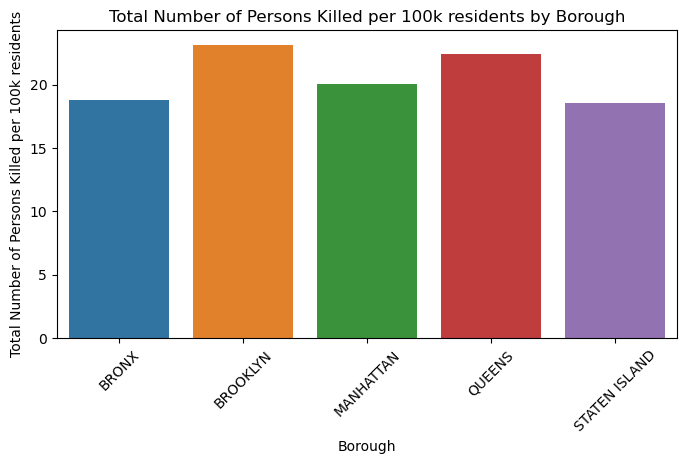

In [46]:
#convert the dictionary keys and values to lists

# Create a barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=list(normalized_killed_per_100k.keys()), y=list(normalized_killed_per_100k.values()))

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Total Number of Persons Killed per 100k residents')
plt.title('Total Number of Persons Killed per 100k residents by Borough')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


After normalizing to population per borough, brooklyn and queens still have the most but not by much, and bronx and staten island are around the same at 18 per 100,000 people.

## Persons Injured

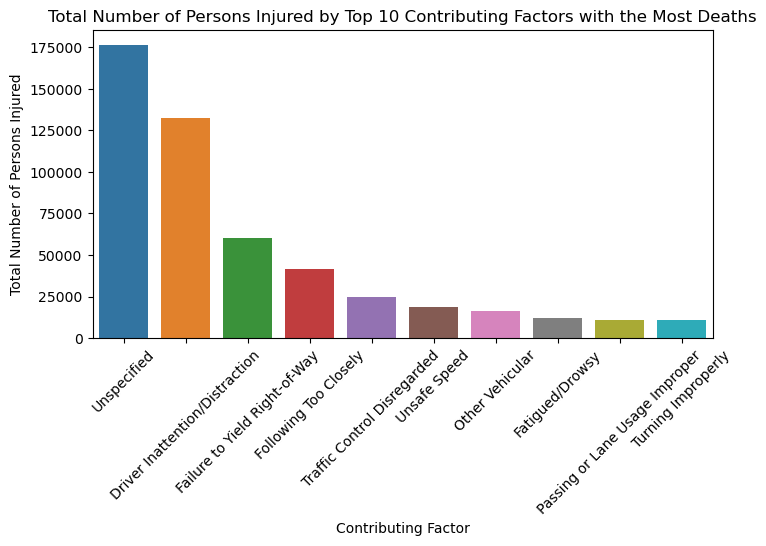

In [62]:
# Calculate the top 10 contributing factors with the highest total number of persons killed
top_10_factors = data.groupby('CONTRIBUTING_FACTOR_VEHICLE_1')['NUMBER_OF_PERSONS_INJURED'].sum().nlargest(10)

# Create a barplot
plt.figure(figsize=(8,4))
sns.barplot(x=top_10_factors.index, y=top_10_factors.values)

# Add labels and title
plt.xlabel('Contributing Factor')
plt.ylabel('Total Number of Persons Injured')
plt.title('Total Number of Persons Injured by Top 10 Contributing Factors with the Most Deaths')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


For persons injured, asided from unspecified, the number one contributor is driver inattention/distraction, and failure to yield. Unsafe speed is a lower contributor here, as that more likely resultsin fatality, where as failure to yield likely results in less fatal injuries, possibly because higher speeds are not attained. 

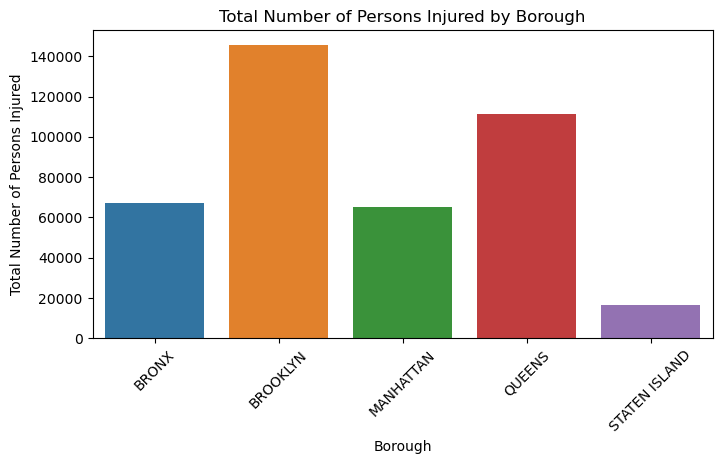

In [58]:
# Calculate the total number of persons killed for each borough
total_injured_by_borough = data.groupby('BOROUGH')['NUMBER_OF_PERSONS_INJURED'].sum()

# Create a barplot
plt.figure(figsize=(8,4))
sns.barplot(x=total_injured_by_borough.index, y=total_injured_by_borough.values)

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Total Number of Persons Injured')
plt.title('Total Number of Persons Injured by Borough')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

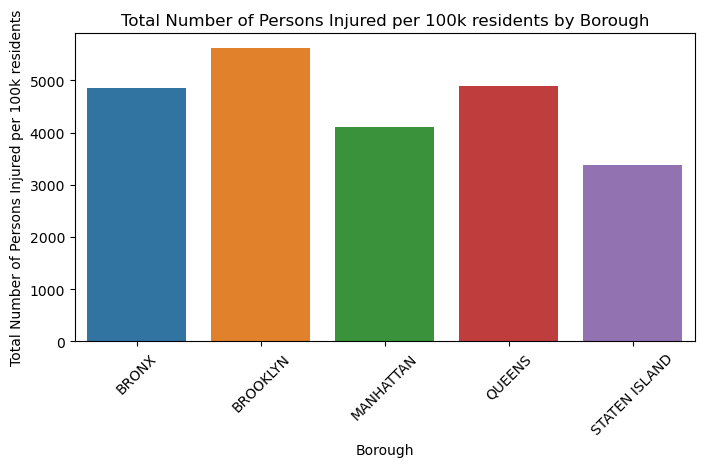

In [60]:
# Calculate normalized injured per 100,000 people
normalized_injured_per_100k = {borough: (killed / population_by_borough[borough]) * 100000 
                               for borough, killed in total_injured_by_borough.items()}
#convert the dictionary keys and values to lists

# Create a barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=list(normalized_injured_per_100k.keys()), y=list(normalized_injured_per_100k.values()))

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Total Number of Persons Injured per 100k residents')
plt.title('Total Number of Persons Injured per 100k residents by Borough')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


After normalization, Bronx actually appears to have a similar injury rate as queens, but brooklyn is still highest

# Pedestrians 

Let's now look at pedestrians. 

## Pedestrians Killed

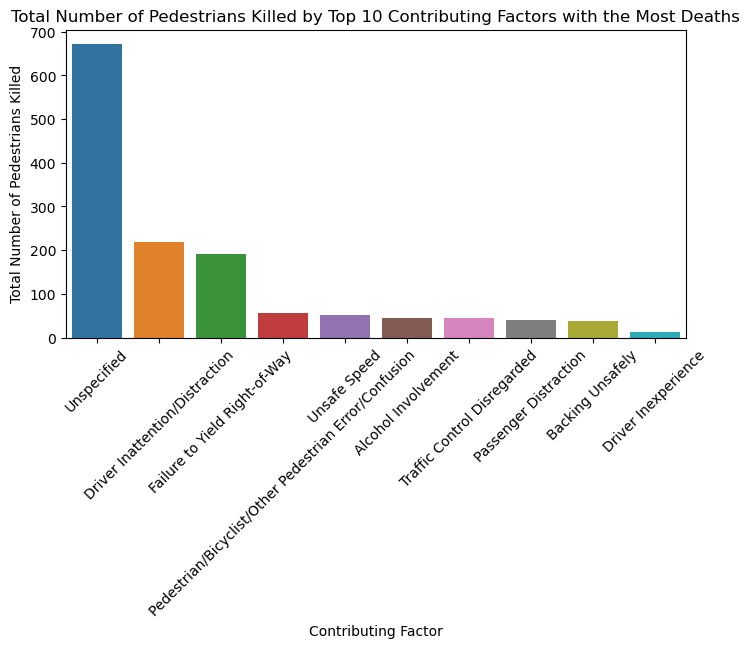

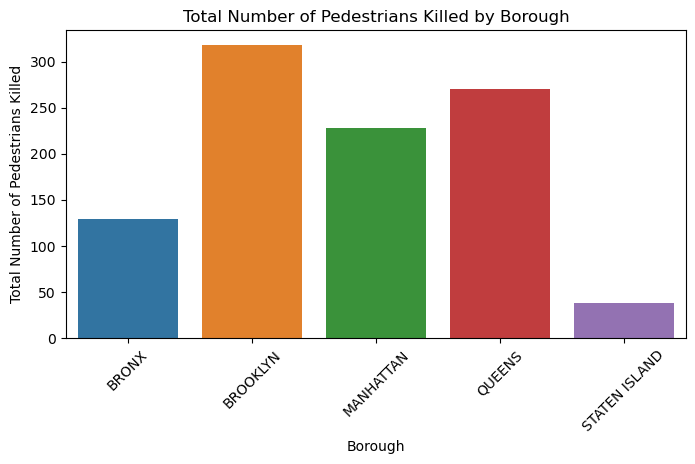

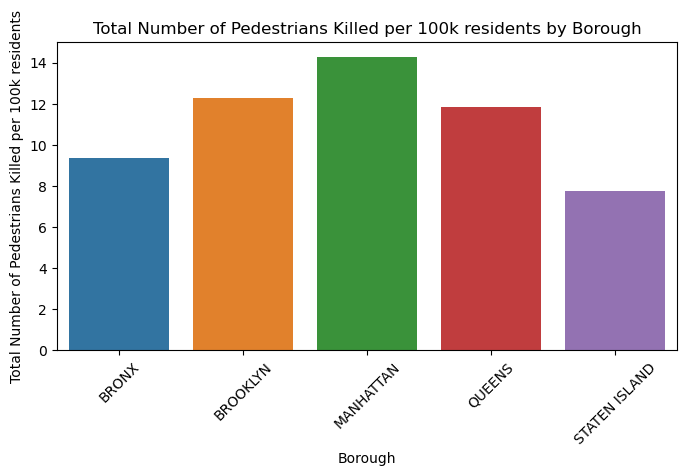

In [71]:
# Calculate the top 10 contributing factors with the highest total number of persons killed
top_10_factors = data.groupby('CONTRIBUTING_FACTOR_VEHICLE_1')['NUMBER_OF_PEDESTRIANS_KILLED'].sum().nlargest(10)

# Create a barplot
plt.figure(figsize=(8,4))
sns.barplot(x=top_10_factors.index, y=top_10_factors.values)

# Add labels and title
plt.xlabel('Contributing Factor')
plt.ylabel('Total Number of Pedestrians Killed')
plt.title('Total Number of Pedestrians Killed by Top 10 Contributing Factors with the Most Deaths')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Calculate the total number of persons killed for each borough
total_killed_by_borough = data.groupby('BOROUGH')['NUMBER_OF_PEDESTRIANS_KILLED'].sum()

# Create a barplot
plt.figure(figsize=(8,4))
sns.barplot(x=total_killed_by_borough.index, y=total_killed_by_borough.values)

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Total Number of Pedestrians Killed')
plt.title('Total Number of Pedestrians Killed by Borough')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Calculate normalized killed per 100,000 people
normalized_injured_per_100k = {borough: (killed / population_by_borough[borough]) * 100000 
                               for borough, killed in total_killed_by_borough.items()}
#convert the dictionary keys and values to lists

# Create a barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=list(normalized_injured_per_100k.keys()), y=list(normalized_injured_per_100k.values()))

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Total Number of Pedestrians Killed per 100k residents')
plt.title('Total Number of Pedestrians Killed per 100k residents by Borough')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


The main cause of death after unspecified for pedestrians is driver inattention and failure to right of way. The borough with the highest number of pedestrian deaths per 100k residents is actually manhattan. This might be because there are more pedestrians walking in manhattan at all hours of the day. 

## Pedestrians Injured

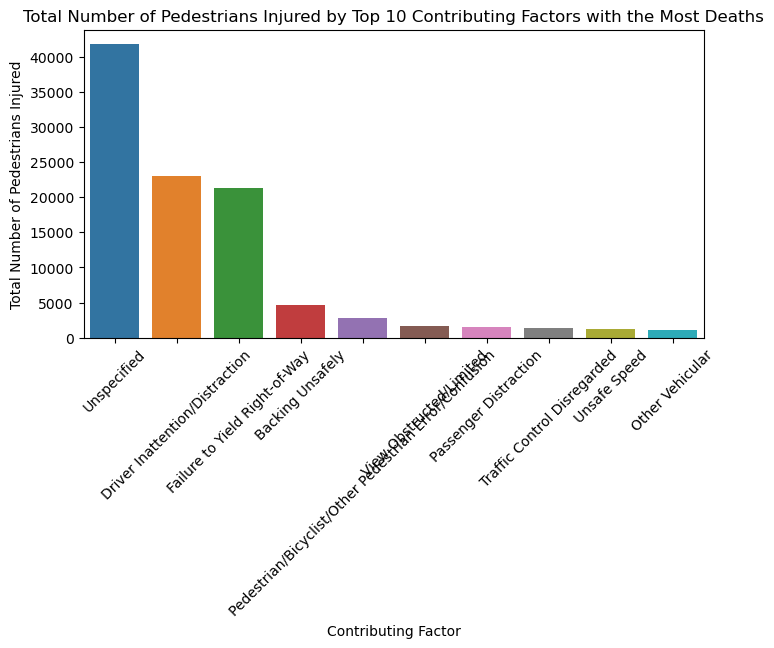

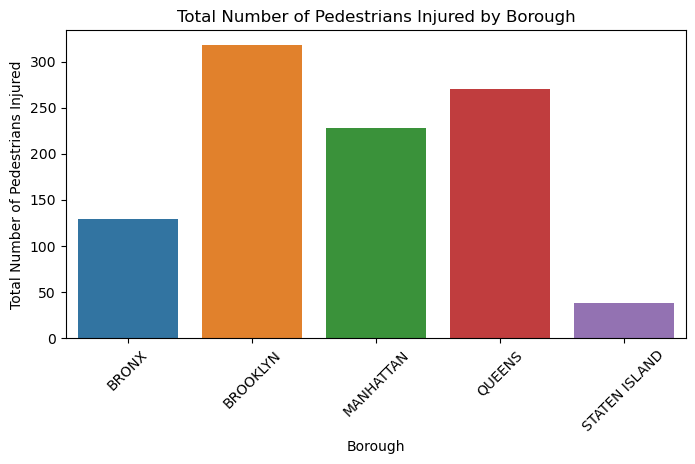

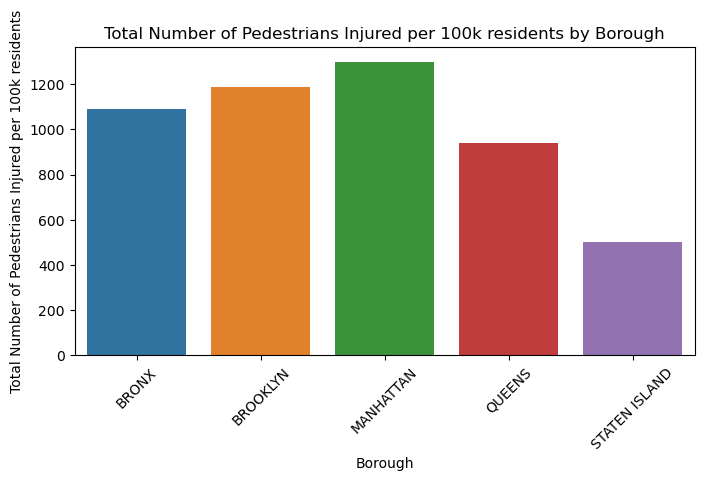

In [72]:
# Calculate the top 10 contributing factors with the highest total number of persons killed
top_10_factors = data.groupby('CONTRIBUTING_FACTOR_VEHICLE_1')['NUMBER_OF_PEDESTRIANS_INJURED'].sum().nlargest(10)

# Create a barplot
plt.figure(figsize=(8,4))
sns.barplot(x=top_10_factors.index, y=top_10_factors.values)

# Add labels and title
plt.xlabel('Contributing Factor')
plt.ylabel('Total Number of Pedestrians Injured')
plt.title('Total Number of Pedestrians Injured by Top 10 Contributing Factors with the Most Deaths')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Calculate the total number of persons killed for each borough
total_injured_by_borough = data.groupby('BOROUGH')['NUMBER_OF_PEDESTRIANS_INJURED'].sum()

# Create a barplot
plt.figure(figsize=(8,4))
sns.barplot(x=total_killed_by_borough.index, y=total_killed_by_borough.values)

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Total Number of Pedestrians Injured')
plt.title('Total Number of Pedestrians Injured by Borough')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Calculate normalized killed per 100,000 people
normalized_injured_per_100k = {borough: (killed / population_by_borough[borough]) * 100000 
                               for borough, killed in total_injured_by_borough.items()}
#convert the dictionary keys and values to lists

# Create a barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=list(normalized_injured_per_100k.keys()), y=list(normalized_injured_per_100k.values()))

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Total Number of Pedestrians Injured per 100k residents')
plt.title('Total Number of Pedestrians Injured per 100k residents by Borough')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


The results for pedestrians injured is similar to that of pedestrians killed, with manhattan being highest. But here, Queens has less pedestrians injured than brooklyn or bronx. 

# Cylists

Let's now look at cyclists. 

## Cyclists killed

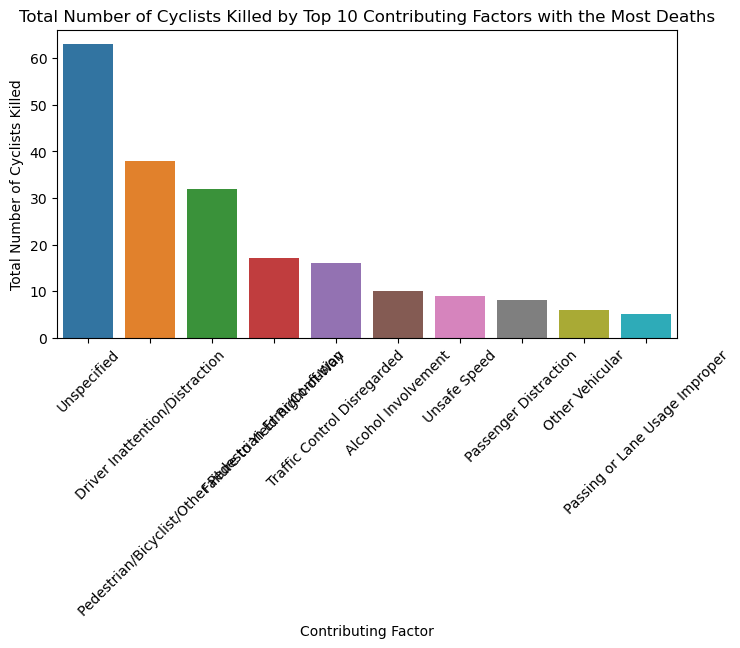

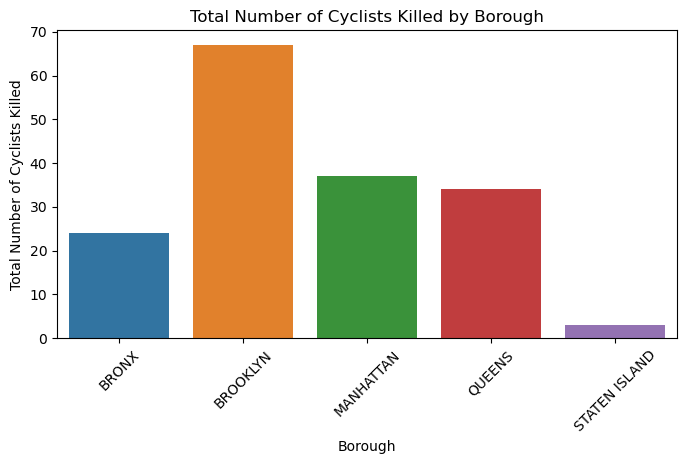

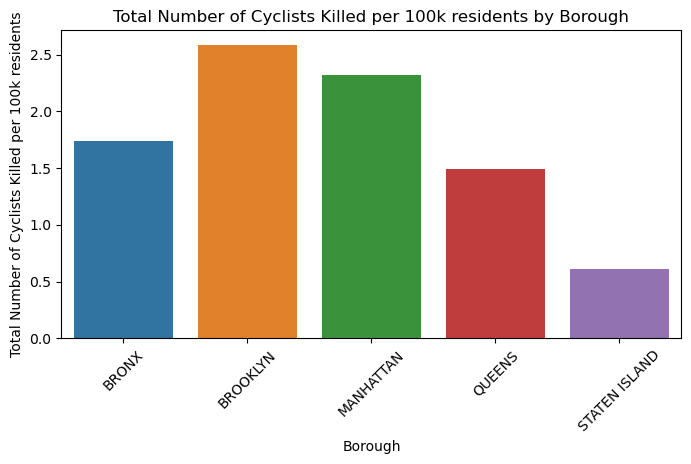

In [66]:
# Calculate the top 10 contributing factors with the highest total number of persons killed
top_10_factors = data.groupby('CONTRIBUTING_FACTOR_VEHICLE_1')['NUMBER_OF_CYCLIST_KILLED'].sum().nlargest(10)

# Create a barplot
plt.figure(figsize=(8,4))
sns.barplot(x=top_10_factors.index, y=top_10_factors.values)

# Add labels and title
plt.xlabel('Contributing Factor')
plt.ylabel('Total Number of Cyclists Killed')
plt.title('Total Number of Cyclists Killed by Top 10 Contributing Factors with the Most Deaths')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Calculate the total number of persons killed for each borough
total_killed_by_borough = data.groupby('BOROUGH')['NUMBER_OF_CYCLIST_KILLED'].sum()

# Create a barplot
plt.figure(figsize=(8,4))
sns.barplot(x=total_killed_by_borough.index, y=total_killed_by_borough.values)

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Total Number of Cyclists Killed')
plt.title('Total Number of Cyclists Killed by Borough')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Calculate normalized killed per 100,000 people
normalized_injured_per_100k = {borough: (killed / population_by_borough[borough]) * 100000 
                               for borough, killed in total_killed_by_borough.items()}
#convert the dictionary keys and values to lists

# Create a barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=list(normalized_injured_per_100k.keys()), y=list(normalized_injured_per_100k.values()))

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Total Number of Cyclists Killed per 100k residents')
plt.title('Total Number of Cyclists Killed per 100k residents by Borough')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


For cyclists deaths, brooklyn is highest followed by manhattan. This may be because there are just more cyclists in these boroughs in general, due to having central park and prospect park, which are heavily visited by cyclists for bike rides.

## Cyclists Injured

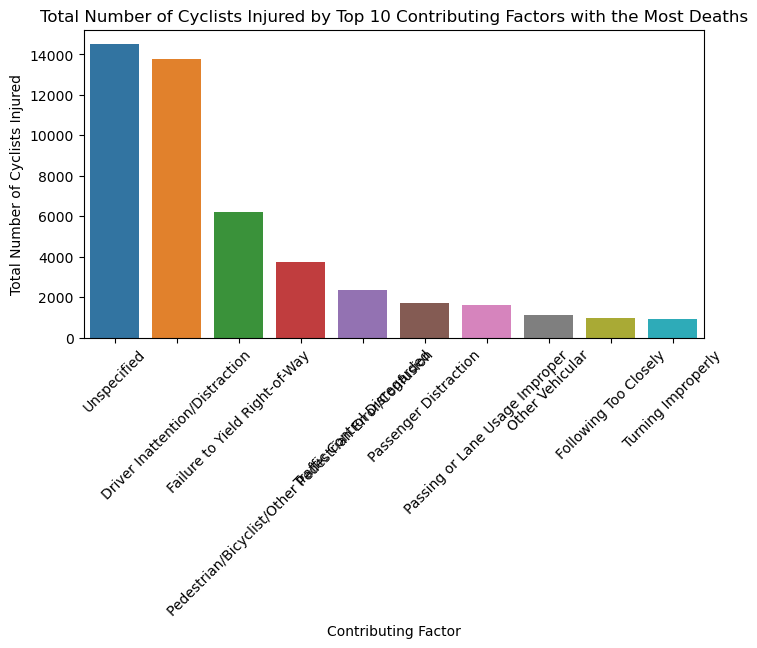

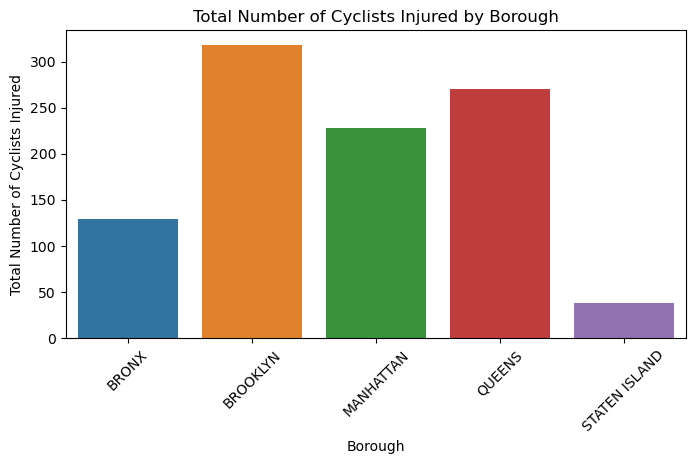

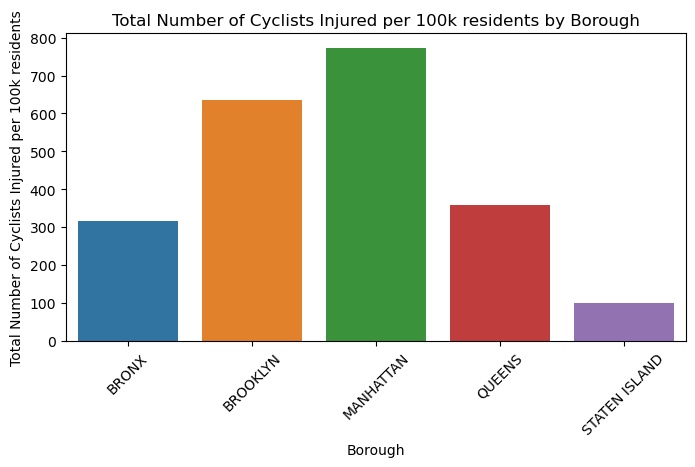

In [73]:
# Calculate the top 10 contributing factors with the highest total number of persons killed
top_10_factors = data.groupby('CONTRIBUTING_FACTOR_VEHICLE_1')['NUMBER_OF_CYCLIST_INJURED'].sum().nlargest(10)

# Create a barplot
plt.figure(figsize=(8,4))
sns.barplot(x=top_10_factors.index, y=top_10_factors.values)

# Add labels and title
plt.xlabel('Contributing Factor')
plt.ylabel('Total Number of Cyclists Injured')
plt.title('Total Number of Cyclists Injured by Top 10 Contributing Factors with the Most Deaths')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Calculate the total number of persons killed for each borough
total_injured_by_borough = data.groupby('BOROUGH')['NUMBER_OF_CYCLIST_INJURED'].sum()

# Create a barplot
plt.figure(figsize=(8,4))
sns.barplot(x=total_killed_by_borough.index, y=total_killed_by_borough.values)

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Total Number of Cyclists Injured')
plt.title('Total Number of Cyclists Injured by Borough')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Calculate normalized killed per 100,000 people
normalized_injured_per_100k = {borough: (killed / population_by_borough[borough]) * 100000 
                               for borough, killed in total_injured_by_borough.items()}
#convert the dictionary keys and values to lists

# Create a barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=list(normalized_injured_per_100k.keys()), y=list(normalized_injured_per_100k.values()))

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Total Number of Cyclists Injured per 100k residents')
plt.title('Total Number of Cyclists Injured per 100k residents by Borough')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


For Injuries of cyclists, manhattan leads by quite a bit, followed by brooklyn. As mentioned before, this is likely due to having major parks located in these boroughs. These boroughs likely have a greater population of cyclists in general.

In [35]:
data.groupby('CONTRIBUTING_FACTOR_VEHICLE_1')['NUMBER_OF_PERSONS_KILLED'].sum().to_frame().reset_index().sort_values(by='NUMBER_OF_PERSONS_KILLED')

,CONTRIBUTING_FACTOR_VEHICLE_1,NUMBER_OF_PERSONS_KILLED
0,1,0
58,Vehicle Vandalism,0
57,Using On Board Navigation Device,0
51,Traffic Control Device Improper/Non-Working,0
47,Texting,0
...,...,...
18,Failure to Yield Right-of-Way,254
52,Traffic Control Disregarded,256
11,Driver Inattention/Distraction,358
55,Unsafe Speed,387


<AxesSubplot:xlabel='CONTRIBUTING_FACTOR_VEHICLE_1'>

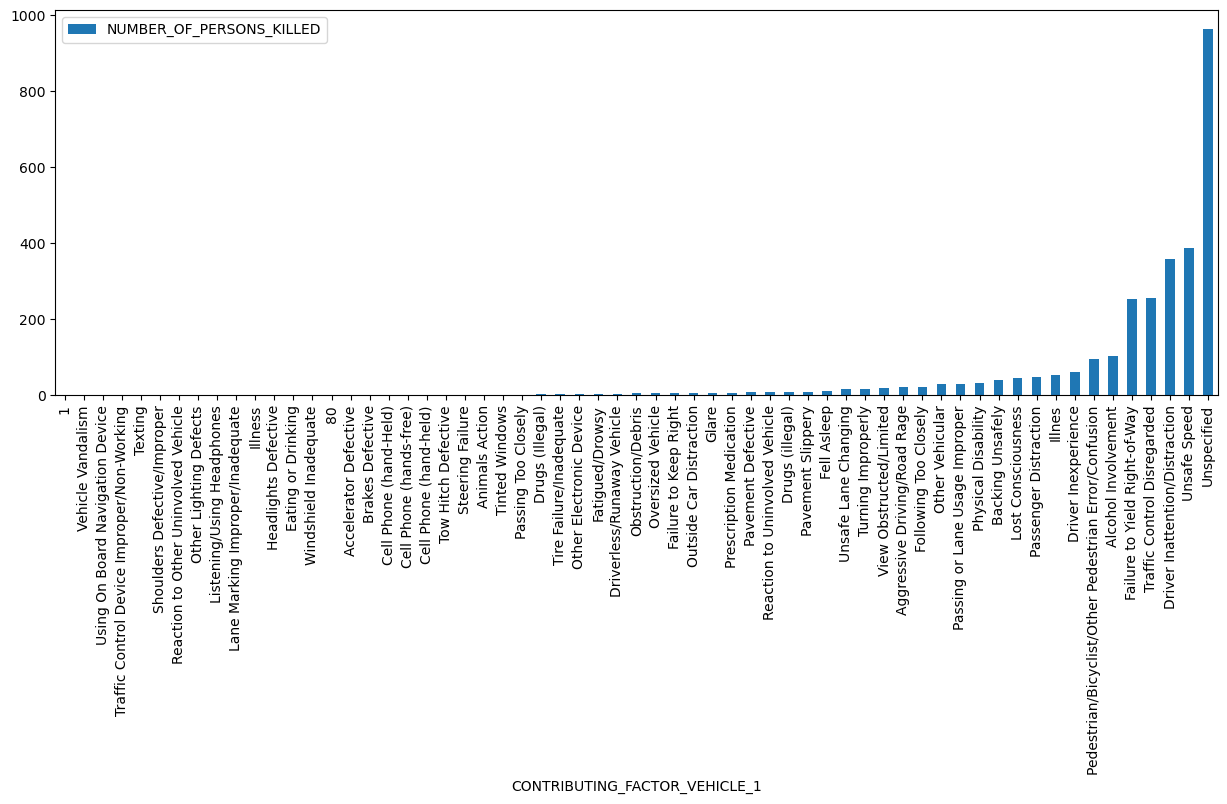

In [36]:
data.groupby('CONTRIBUTING_FACTOR_VEHICLE_1')['NUMBER_OF_PERSONS_KILLED'].sum().to_frame().reset_index().sort_values(by='NUMBER_OF_PERSONS_KILLED').plot(x='CONTRIBUTING_FACTOR_VEHICLE_1', y='NUMBER_OF_PERSONS_KILLED', kind='bar', figsize=(15, 5))


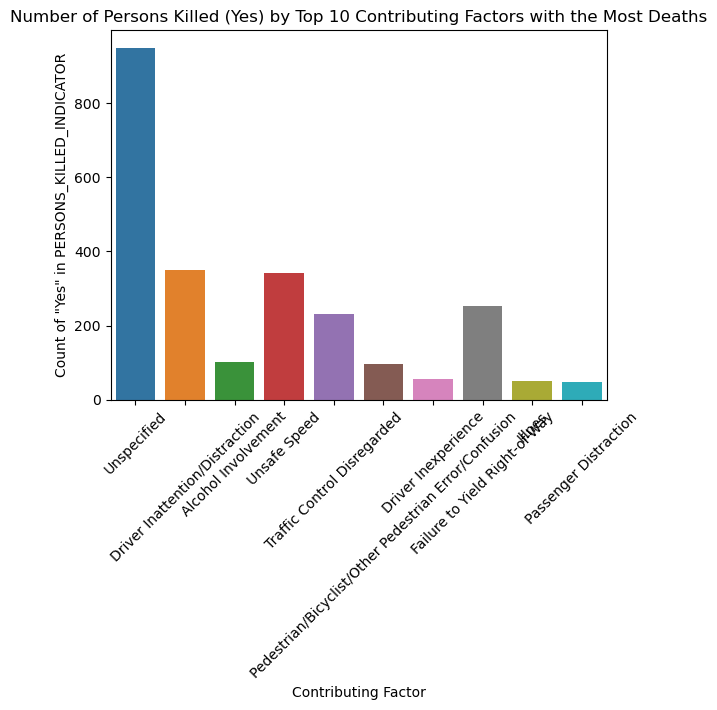

In [166]:
# Calculate the top 10 contributing factors with the most deaths
top_10_factors = data[data['PERSONS_KILLED_INDICATOR'] == 'Yes']['CONTRIBUTING_FACTOR_VEHICLE_1'].value_counts().head(10).index

# Filter the data for the top 10 factors with "Yes" in PERSONS_KILLED_INDICATOR
filtered_data = data[data['CONTRIBUTING_FACTOR_VEHICLE_1'].isin(top_10_factors) & (data['PERSONS_KILLED_INDICATOR'] == 'Yes')]

# Create a barplot
sns.countplot(data=filtered_data, x='CONTRIBUTING_FACTOR_VEHICLE_1')

# Add labels and title
plt.xlabel('Contributing Factor')
plt.ylabel('Count of "Yes" in PERSONS_KILLED_INDICATOR')
plt.title('Number of Persons Killed (Yes) by Top 10 Contributing Factors with the Most Deaths')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


<AxesSubplot:xlabel='BOROUGH', ylabel='count'>

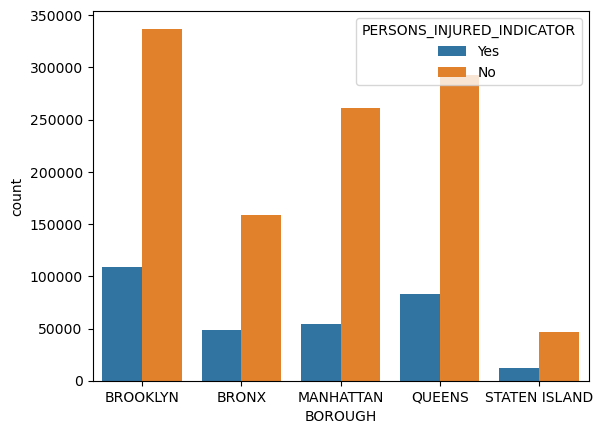

In [148]:
sns.countplot(data=data, x='BOROUGH', hue='PERSONS_INJURED_INDICATOR')

<AxesSubplot:xlabel='YEAR', ylabel='count'>

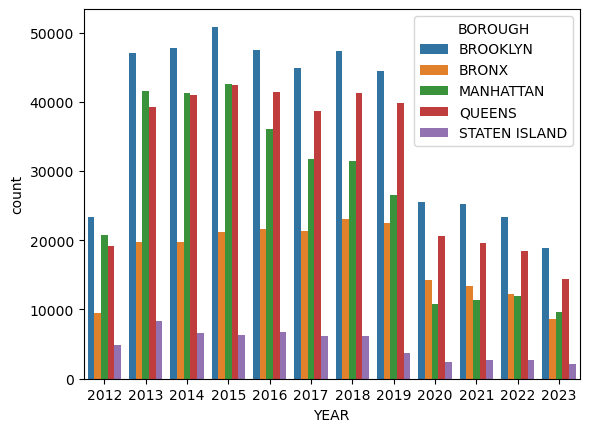

In [139]:
sns.countplot(data=data, x='YEAR', hue='BOROUGH')